In [3]:
!pip install  shap

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import wilcoxon
from sklearn.metrics import matthews_corrcoef
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn import svm
import pandas as pd
import shap
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer




# Function to compute SHAP values for a given classifier

In [5]:

def compute_shap_values(classifier, X):
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X)
    return shap_values

## Decision Tree

In [18]:
def Decision_Tree(LargeClassSmell):
    global DT_Scores
    global DT_accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    param_dist = {'max_depth':list(np.arange(1, 100, step=10)) + [None]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    tree = DecisionTreeClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10 , random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=rfolds, return_train_score=True, scoring = mcc)
    tree_cv.fit(X,Y)
    DT_Scores = cross_val_score(tree_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    DT_accuracy = cross_val_score(tree_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best MCC score is {}".format(DT_Scores.mean()))
    print("Best accuracy is {}".format(DT_accuracy.mean()))

    # Compute SHAP values
    shap_values = compute_shap_values(tree_cv.best_estimator_, X)
    shap.summary_plot(shap_values, X, feature_names=X.columns)

## # Random Forest with SHAP


In [61]:
def Random_Forest(LargeClassSmell):
    global RF_Scores
    global RF_Accuracy
    global RF_shap_values
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    param_grid = {'n_estimators': [100, 200, 300]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = GridSearchCV(rf, param_grid, cv=rfolds, scoring=mcc)
    rf_cv.fit(X, Y)
    RF_Scores = cross_val_score(rf_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds)
    RF_Accuracy = cross_val_score(rf_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds)

    # Train the model on the entire dataset (replace this with your actual training)
    model = rf_cv.best_estimator_
    model.fit(X, Y)

    # Calculate SHAP values for feature importance
    explainer = shap.TreeExplainer(model)
    RF_shap_values = explainer.shap_values(X)

    print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
    print("Best MCC score is {}".format(RF_Scores.mean()))
    print("Best accuracy is {}".format(RF_Accuracy.mean()))

    return RF_Scores



##  Logistic Regression with SHAP

In [80]:
def Logistic_Regression(LargeClassSmell):
    global LR_Scores
    global LR_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    lr = LogisticRegression()
    lr.fit(X, Y)
    lr.predict(X)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    LR_Scores = cross_val_score(lr, X, Y, scoring=mcc, cv=rfolds)
    LR_Accuracy = cross_val_score(lr, X, Y, scoring='accuracy', cv=rfolds)
    print("Best MCC score is {}".format(LR_Scores.mean()))
    print("Best accuracy is {}".format(LR_Accuracy.mean()))

    # Compute SHAP values using KernelExplainer
    background = shap.sample(X, 100)  # Adjust the number of samples as needed
    explainer = shap.KernelExplainer(lr.predict_proba, background)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, feature_names=X.columns)


## Support Vector Machine  with SHAP


In [83]:

def SVM(LargeClassSmell):
    global SVM_Scores
    global SVM_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)
    param_dist = {"C": [.01, .1, 1, 5, 10, 100], "gamma": [0, .01, .1, 1, 5, 10, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    svm_clf = svm.SVC()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    svm_cv = RandomizedSearchCV(svm_clf, param_dist, cv=rfolds, scoring=mcc)
    svm_cv.fit(X, Y)
    SVM_Scores = cross_val_score(svm_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds)
    SVM_Accuracy = cross_val_score(svm_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds)
    print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
    print("Best MCC score is {}".format(SVM_Scores.mean()))
    print("Best accuracy is {}".format(SVM_Accuracy.mean()))

    background = shap.sample(X, 20)
    explainer = shap.KernelExplainer(svm_cv.best_estimator_.predict, background, n_jobs=-1)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, feature_names=X.columns)


## Multi-Layer Perceptron with SHAP

In [86]:

def MLP(LargeClassSmell):
    global MLP_Scores
    global MLP_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)
    param_dist = {"hidden_layer_sizes": [4, 8, 16, 32, 64, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    mlp_clf = MLPClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    mlp_cv = RandomizedSearchCV(mlp_clf, param_dist, cv=rfolds, scoring=mcc)
    mlp_cv.fit(X, Y)
    MLP_Scores = cross_val_score(mlp_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds)
    MLP_Accuracy = cross_val_score(mlp_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds)
    print("Tuned MLP Parameters: {}".format(mlp_cv.best_params_))
    print("Best MCC score is {}".format(MLP_Scores.mean()))
    print("Best accuracy is {}".format(MLP_Accuracy.mean()))

    background = shap.sample(X, 100)
    explainer = shap.KernelExplainer(mlp_cv.best_estimator_.predict_proba, background)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, feature_names=X.columns)


## Stochastic Gradient Descent with SHAP


In [97]:
def SGD(LargeClassSmell):
    global SGD_Scores
    global SGD_Accuracy

    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    sgd_clf = SGDClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    SGD_Scores = cross_val_score(sgd_clf, X, Y, cv=rfolds, scoring=mcc)
    SGD_Accuracy = cross_val_score(sgd_clf, X, Y, cv=rfolds)

    print("MCC: ", SGD_Scores.mean())
    print("Accuracy: ", SGD_Accuracy.mean())

    return SGD_Scores


In [58]:

def wilcoxonTest(firstModelScore, secondModelScore):
    # Convert to numpy arrays if not already
    firstModelScore = np.array(firstModelScore)
    secondModelScore = np.array(secondModelScore)

    # Check if the arrays have the same length
    if len(firstModelScore) != len(secondModelScore):
        raise ValueError("The samples x and y must have the same length.")

    # Perform Wilcoxon signed-rank test
    stat, p = wilcoxon(firstModelScore, secondModelScore, zero_method='zsplit')

    # Determine the winner and loser based on mean scores
    mean1 = firstModelScore.mean()
    mean2 = secondModelScore.mean()
    if p <= 0.05:
        if mean1 > mean2:
            win = "Model1"
            loss = "Model2"
        else:
            win = "Model2"
            loss = "Model1"
    else:
        win = "No significant difference"
        loss = "No significant difference"

    # Return the results
    wilcoxonResults = {
        "winner": win,
        "losser": loss,
        "statics": stat,
        "p-Value": p
    }
    return wilcoxonResults


# Large Class Dataset

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score is 0.8935090117309602
Best accuracy is 0.9558672086720865


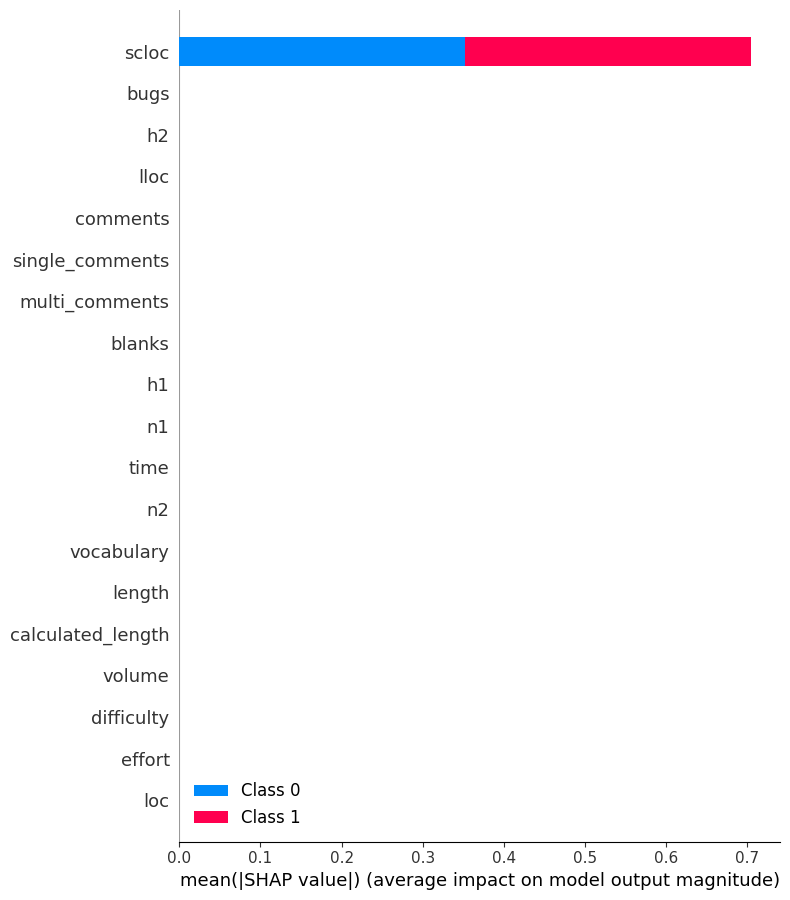

In [12]:
Decision_Tree('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tuned Random Forest Parameters: {'n_estimators': 100}
Best MCC score is 0.8655245608662133
Best accuracy is 0.9490168623908463


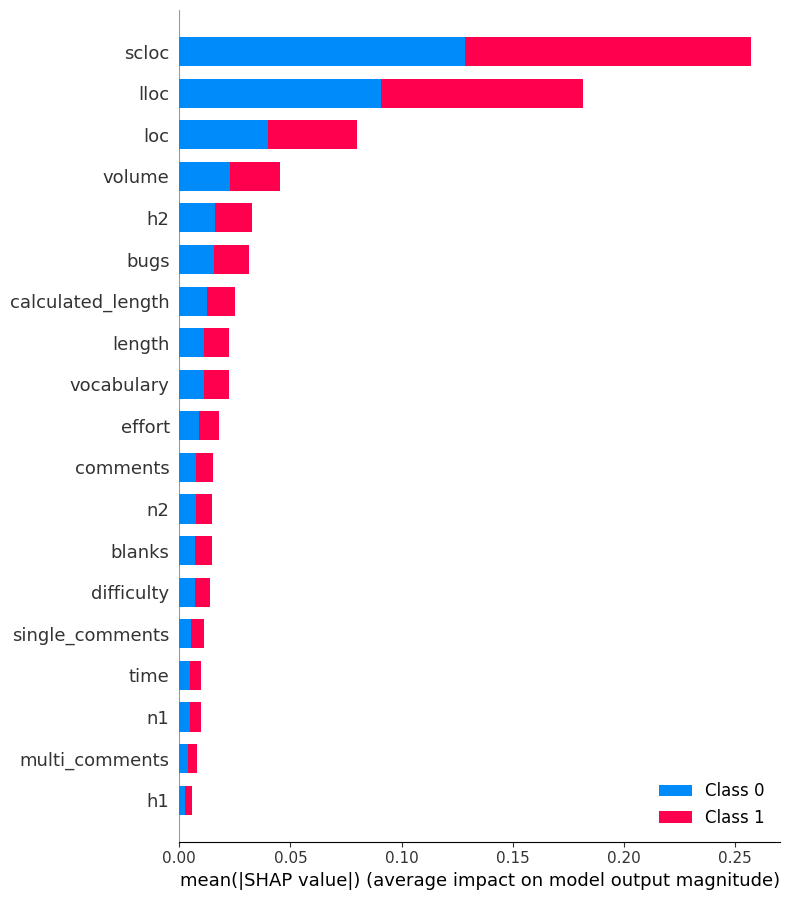

In [62]:
Random_Forest_GridSearch('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Best MCC score is 0.6795424523865684
Best accuracy is 0.8840755796446854


  0%|          | 0/816 [00:00<?, ?it/s]

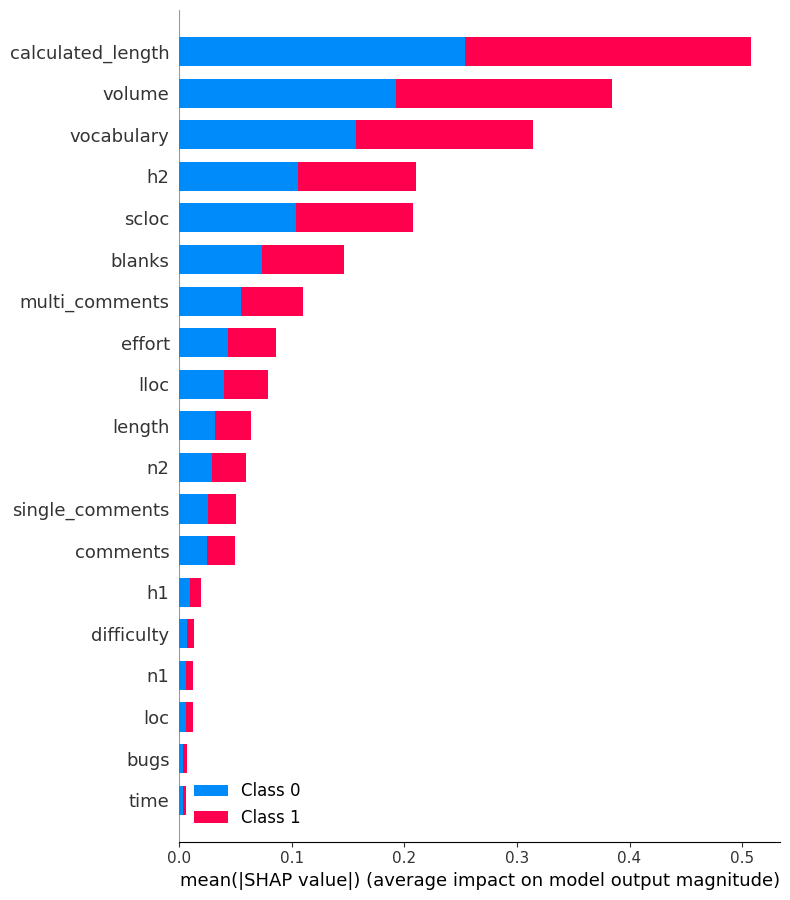

In [82]:
Logistic_Regression('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Tuned SVM Parameters: {'gamma': 0.01, 'C': 5}
Best MCC score is 0.03682094915304723
Best accuracy is 0.7466907557964472


  0%|          | 0/816 [00:00<?, ?it/s]

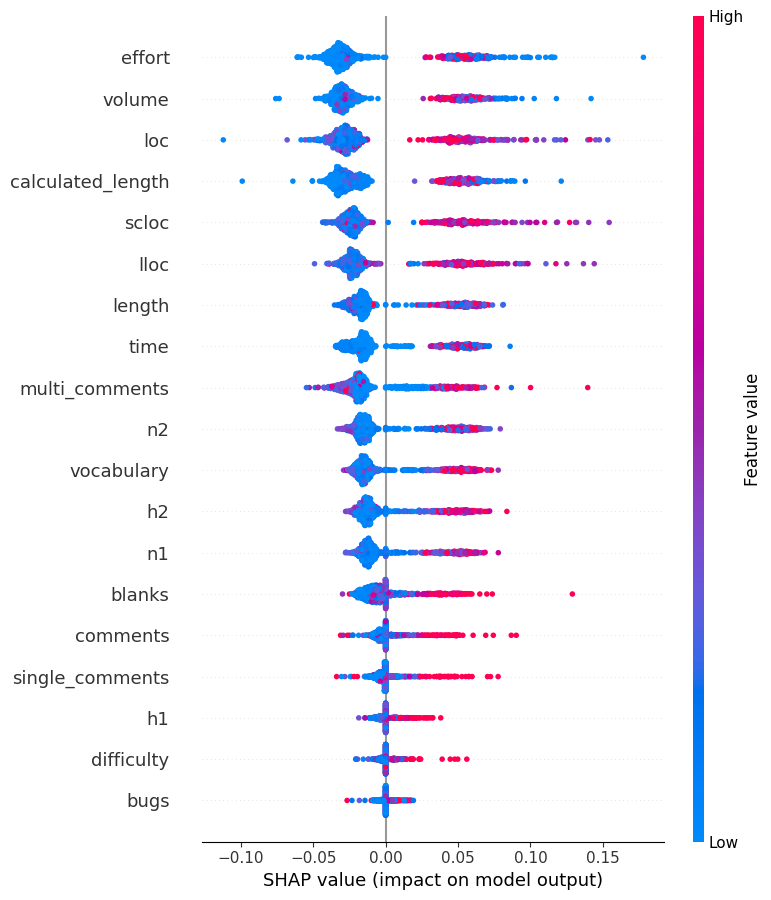

In [85]:
SVM('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged

Tuned MLP Parameters: {'hidden_layer_sizes': 64}
Best MCC score is 0.6112946970135812
Best accuracy is 0.8596973803071364


  0%|          | 0/816 [00:00<?, ?it/s]

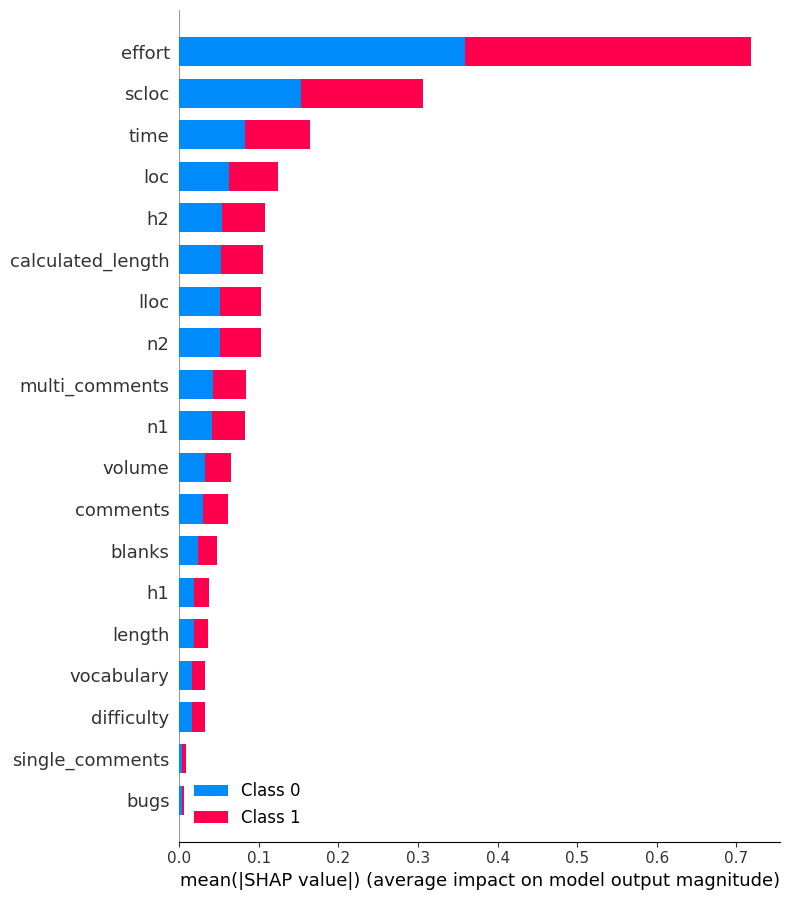

In [88]:
MLP('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

In [98]:
SGD('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

MCC:  0.4216549515795828
Accuracy:  0.7457256850346279


array([ 0.        ,  0.34563644,  0.61886962,  0.50283603,  0.56694681,
        0.43320809,  0.54699197,  0.37052087,  0.32218999,  0.        ,
        0.38857719, -0.06519319,  0.52068331,  0.        ,  0.46440196,
        0.38857719,  0.41972516,  0.51949994,  0.61682334,  0.5280008 ,
        0.45807944,  0.40205913,  0.59592353,  0.17975619,  0.31018195,
        0.54756304,  0.30729603,  0.26101725,  0.46513733,  0.61591637,
        0.58673869,  0.37901864,  0.52180366,  0.24366374,  0.447039  ,
        0.34220666,  0.6710512 ,  0.51055028,  0.        ,  0.49839402,
        0.447039  ,  0.51028939,  0.56657331,  0.62876744,  0.        ,
        0.5440417 ,  0.40488817,  0.28817621,  0.6697801 ,  0.37052087,
        0.4224774 ,  0.24344901,  0.38595615,  0.22446819,  0.633855  ,
        0.57971355,  0.47825249,  0.        ,  0.41833001,  0.48571429,
        0.47029923,  0.47887713,  0.5906085 ,  0.24089901,  0.6050861 ,
        0.42453318,  0.46485814,  0.46700114,  0.56469244,  0.55

## Large Class Wilcoxon Test





In [67]:
print(type(DT_Scores))
print(type(LR_Scores))


<class 'numpy.ndarray'>
<class 'float'>


In [63]:
wilcoxonTest(DT_Scores, RF_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 1305.0,
 'p-Value': 2.7312775953761184e-05}

In [84]:
wilcoxonTest(DT_Scores,LR_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 8.0,
 'p-Value': 4.959095268532253e-18}

In [90]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.836337002320836e-18}

In [91]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.896340037647931e-18}

In [101]:
print((SGD_Scores))


[ 0.          0.34563644  0.61886962  0.50283603  0.56694681  0.43320809
  0.54699197  0.37052087  0.32218999  0.          0.38857719 -0.06519319
  0.52068331  0.          0.46440196  0.38857719  0.41972516  0.51949994
  0.61682334  0.5280008   0.45807944  0.40205913  0.59592353  0.17975619
  0.31018195  0.54756304  0.30729603  0.26101725  0.46513733  0.61591637
  0.58673869  0.37901864  0.52180366  0.24366374  0.447039    0.34220666
  0.6710512   0.51055028  0.          0.49839402  0.447039    0.51028939
  0.56657331  0.62876744  0.          0.5440417   0.40488817  0.28817621
  0.6697801   0.37052087  0.4224774   0.24344901  0.38595615  0.22446819
  0.633855    0.57971355  0.47825249  0.          0.41833001  0.48571429
  0.47029923  0.47887713  0.5906085   0.24089901  0.6050861   0.42453318
  0.46485814  0.46700114  0.56469244  0.55919624  0.54978528  0.47029923
  0.54367885  0.31116518  0.3720571   0.5440417   0.52516105  0.54150014
  0.29195038  0.          0.49434229  0.30744303  0

In [102]:
wilcoxonTest(DT_Scores, SGD_Scores)


{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.896559845095909e-18}

In [93]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 13.0,
 'p-Value': 5.766559568715047e-18}

In [103]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.862629613550349e-18}

In [104]:
wilcoxonTest(RF_Scores,MLP_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 36.0,
 'p-Value': 1.1485179010089616e-17}

In [106]:
wilcoxonTest(RF_Scores, SGD_Scores)


{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.896340037647931e-18}

In [107]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.8840495625051566e-18}

In [108]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 1674.0,
 'p-Value': 0.003433349985234562}

In [110]:
wilcoxonTest(LR_Scores,SGD_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 78.0,
 'p-Value': 3.976797993175688e-17}

In [111]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner': 'Model2',
 'losser': 'Model1',
 'statics': 0.0,
 'p-Value': 3.893263967270896e-18}

In [113]:
wilcoxonTest(SVM_Scores,SGD_Scores)

{'winner': 'Model2',
 'losser': 'Model1',
 'statics': 27.5,
 'p-Value': 8.891015366568391e-18}

In [114]:
wilcoxonTest(MLP_Scores,SGD_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 581.0,
 'p-Value': 2.323425662107666e-11}

# Example Wilcoxon test results


In [115]:

wilcoxon_result_large_class = wilcoxonTest(DT_Scores, RF_Scores)

# Large Class Boxplot

In [117]:

df=pd.DataFrame({'DT':DT_Scores,'RF':RF_Scores,'LR':LR_Scores,'SVM':SVM_Scores
                ,'MLP':MLP_Scores,'SGD':SGD_Scores} )

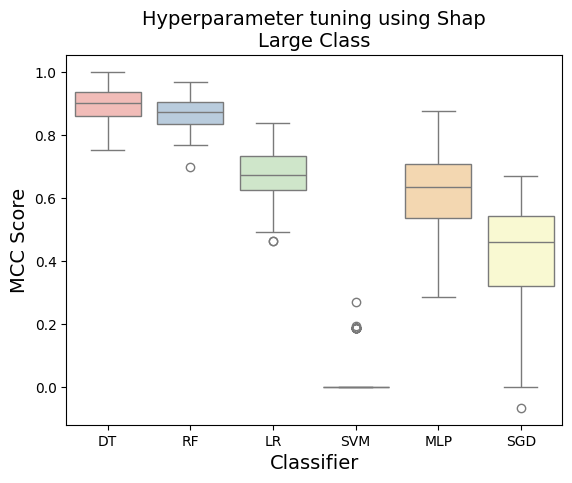

In [118]:

colors = ['#78C850', '#6890F0', '#F8D030', '#F85888', '#705898', '#98D8D8']
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)

boxplot.axes.set_title("Hyperparameter tuning using Shap\nLarge Class", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)

plt.show()


In [119]:
df=pd.DataFrame({'DT':DT_accuracy,'RF':RF_Accuracy,'LR':LR_Accuracy,'SVM':SVM_Accuracy
                ,'MLP':MLP_Accuracy,'SGD':SGD_Accuracy} )

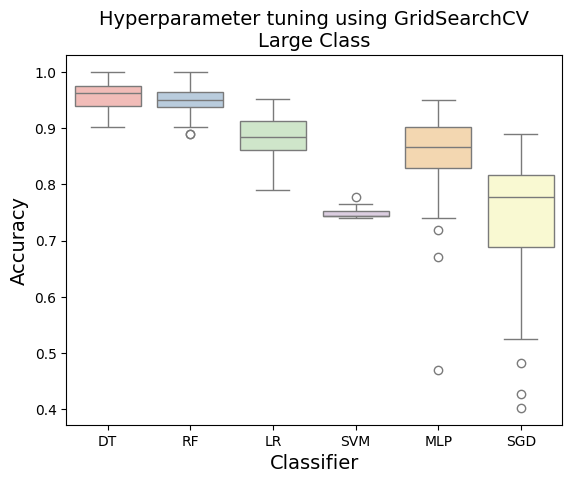

In [120]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Hyperparameter tuning using GridSearchCV\nLarge Class", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

# Example boxplot data


In [121]:

df_large_class = pd.DataFrame({'DT': DT_Scores, 'RF': RF_Scores, 'LR': LR_Scores})


# Long Method Dataset

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score is 0.8935090117309602
Best accuracy is 0.9558672086720865


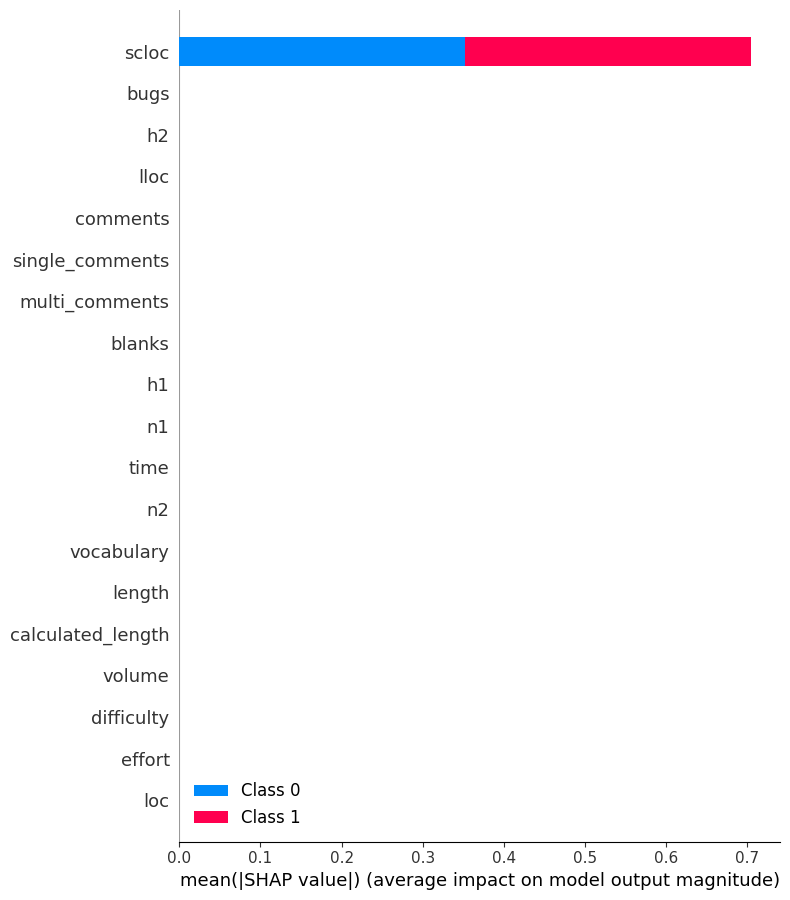

In [33]:
Decision_Tree('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned Random Forest Parameters: {'n_estimators': 100}
Best MCC score is 0.8718763261381064
Best accuracy is 0.9481782595603734


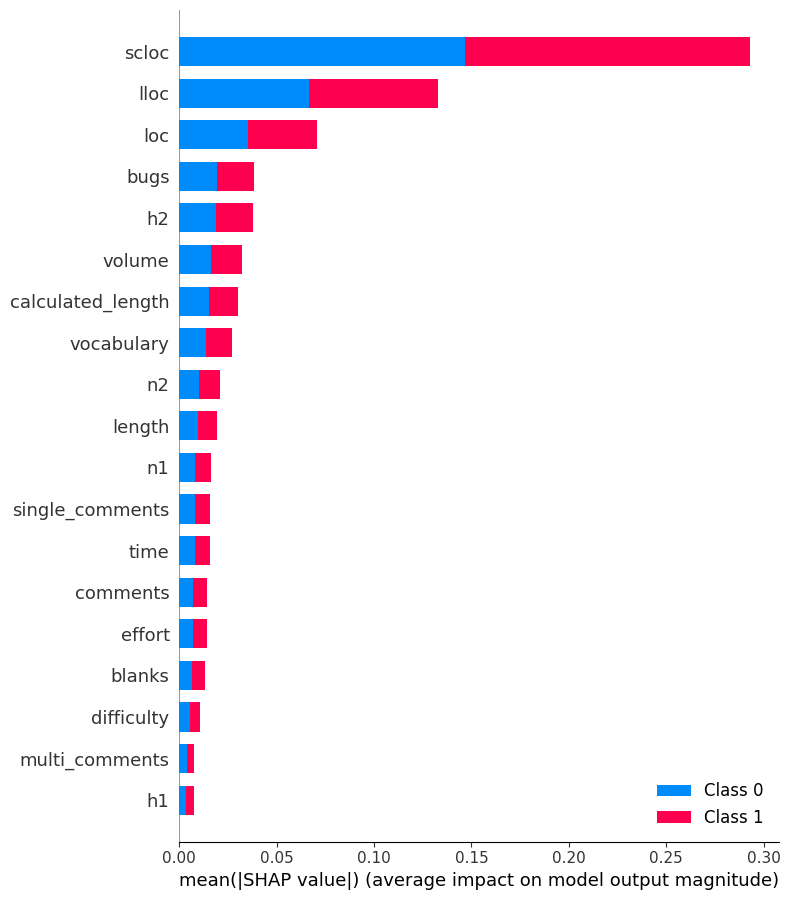

In [34]:
Random_Forest_GridSearch('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Best MCC score is 0.6834080448423271
Best accuracy is 0.88079945799458


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


  0%|          | 0/816 [00:00<?, ?it/s]

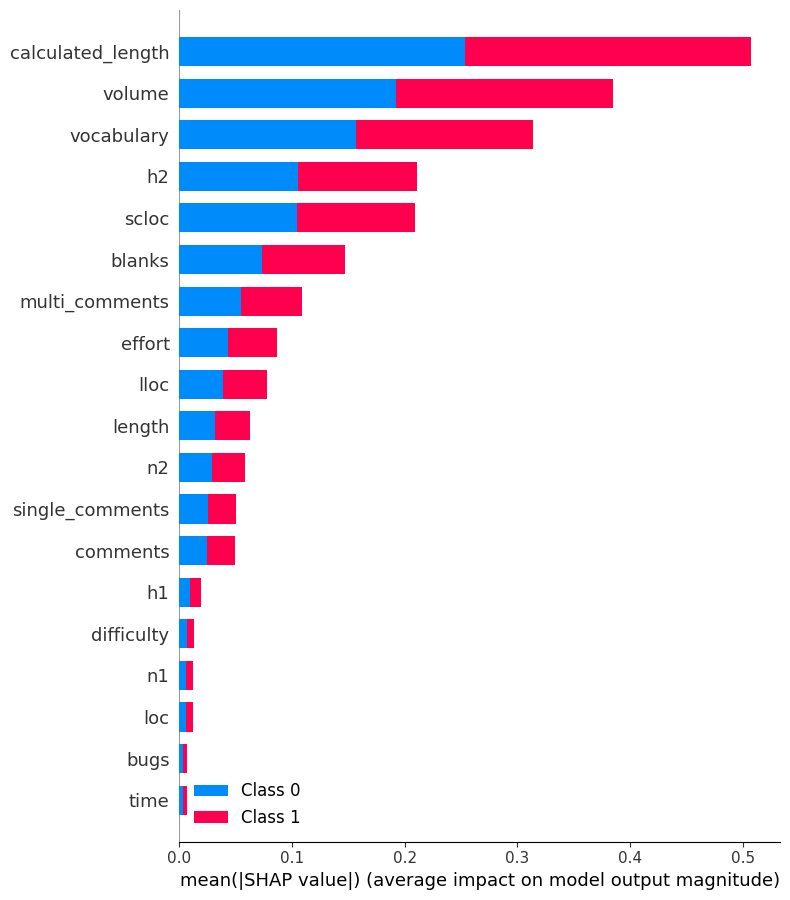

In [35]:
Logistic_Regression('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned SVM Parameters: {'gamma': 0.01, 'C': 10}
Best MCC score is 0.03803905089751029
Best accuracy is 0.7465718157181572


  0%|          | 0/816 [00:00<?, ?it/s]

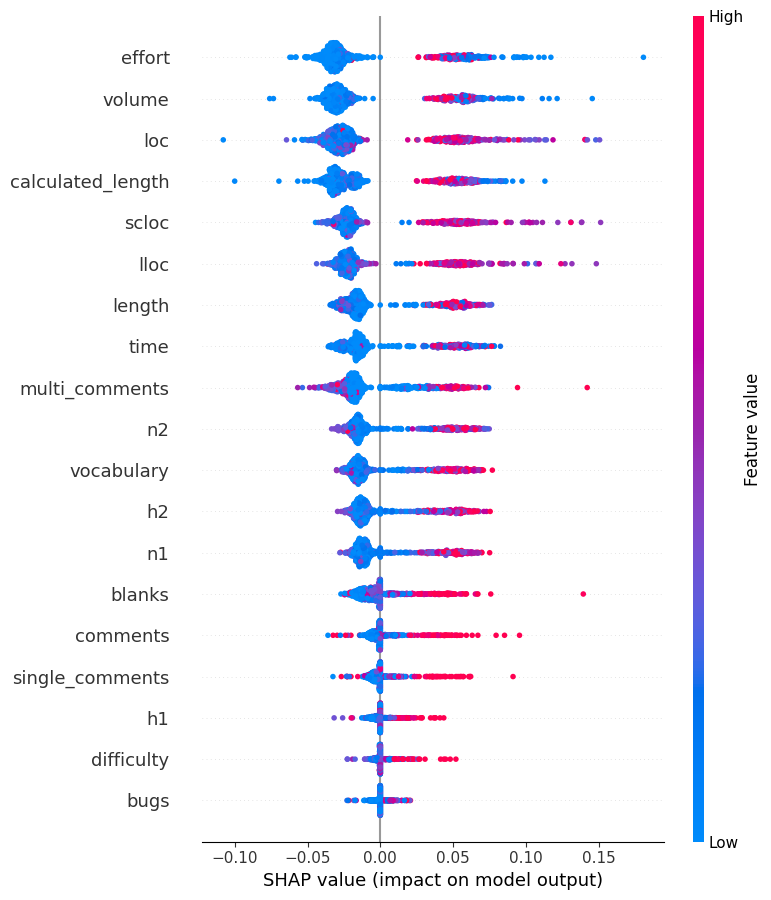

In [36]:
SVM('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged

Tuned MLP Parameters: {'hidden_layer_sizes': 100}
Best MCC score is 0.6261280556637101
Best accuracy is 0.8537157482685938


  0%|          | 0/816 [00:00<?, ?it/s]

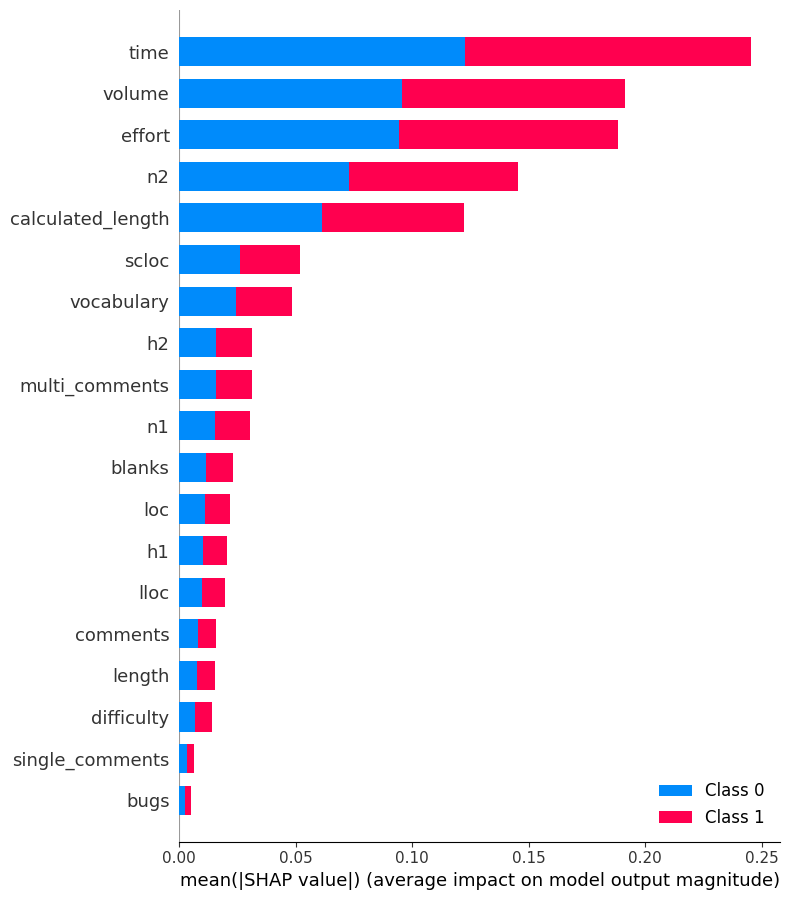

In [39]:
MLP('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

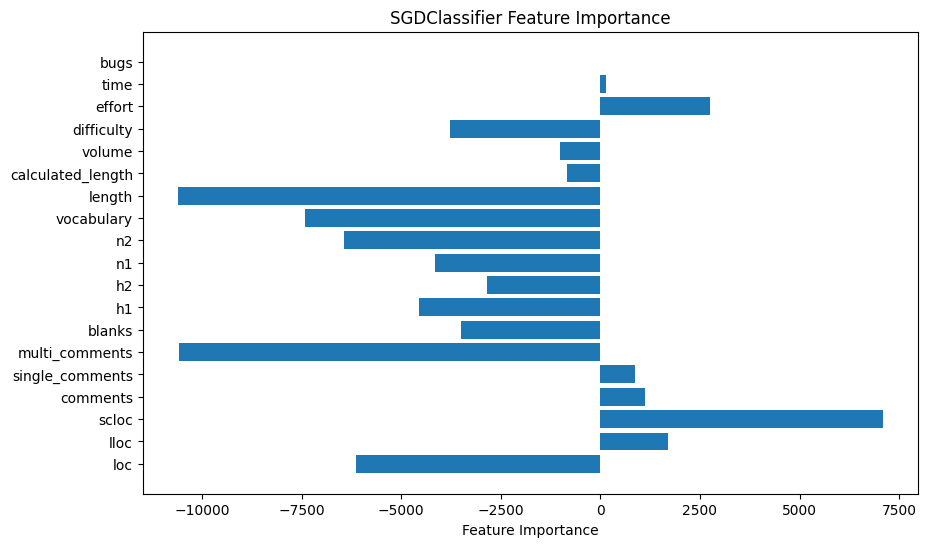

Mean MCC score:  0.4147562812716493
Mean accuracy:  0.7546130683529055


In [40]:
SGD('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

## Long Method Wilcoxon Test

In [122]:
wilcoxonTest(DT_Scores,RF_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 1305.0,
 'p-Value': 2.7312775953761184e-05}

In [123]:
wilcoxonTest(DT_Scores,LR_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 8.0,
 'p-Value': 4.959095268532253e-18}

In [124]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.836337002320836e-18}

In [125]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.896340037647931e-18}

In [127]:
wilcoxonTest(DT_Scores,SGD_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.896559845095909e-18}

In [128]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 13.0,
 'p-Value': 5.766559568715047e-18}

In [129]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.862629613550349e-18}

In [ ]:
wilcoxonTest(RF_Scores,MLP_Scores)

In [131]:
wilcoxonTest(RF_Scores,SGD_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.896340037647931e-18}

In [132]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 0.0,
 'p-Value': 3.8840495625051566e-18}

In [133]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 1674.0,
 'p-Value': 0.003433349985234562}

In [135]:
wilcoxonTest(LR_Scores,SGD_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 78.0,
 'p-Value': 3.976797993175688e-17}

In [134]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner': 'Model2',
 'losser': 'Model1',
 'statics': 0.0,
 'p-Value': 3.893263967270896e-18}

In [136]:
wilcoxonTest(SVM_Scores,SGD_Scores)

{'winner': 'Model2',
 'losser': 'Model1',
 'statics': 27.5,
 'p-Value': 8.891015366568391e-18}

In [137]:
wilcoxonTest(MLP_Scores,SGD_Scores)

{'winner': 'Model1',
 'losser': 'Model2',
 'statics': 581.0,
 'p-Value': 2.323425662107666e-11}

# Example Wilcoxon test results


In [138]:

wilcoxon_result_long_method = wilcoxonTest(DT_Scores, LR_Scores)


# Long Method Boxplot

In [140]:
df=pd.DataFrame({'DT':DT_Scores,'RF':RF_Scores,'LR':LR_Scores,'SVM':SVM_Scores
                ,'MLP':MLP_Scores,'SGD':SGD_Scores} )

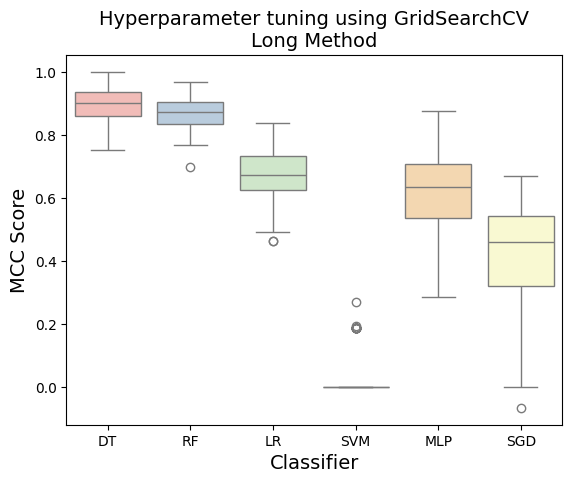

In [141]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Hyperparameter tuning using GridSearchCV\nLong Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)
plt.show()

In [142]:

df=pd.DataFrame({'DT':DT_accuracy,'RF':RF_Accuracy,'LR':LR_Accuracy,'SVM':SVM_Accuracy
                ,'MLP':MLP_Accuracy,'SGD':SGD_Accuracy} )

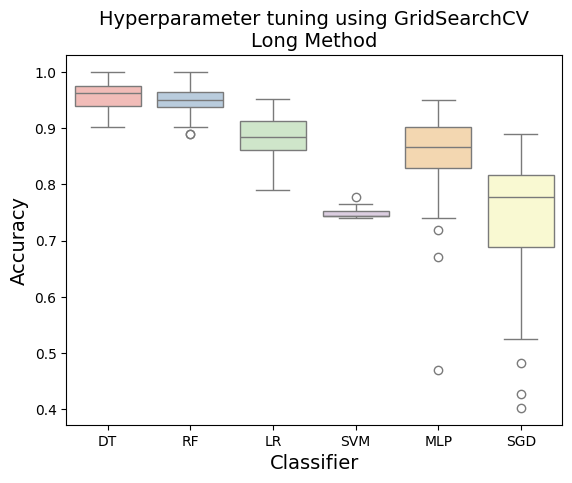

In [143]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Hyperparameter tuning using GridSearchCV\nLong Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

# Example boxplot data


In [145]:
df_long_method = pd.DataFrame({'DT': DT_Scores, 'RF': RF_Scores, 'LR': LR_Scores})


In [146]:
def compare_datasets(wilcoxon_result, df):
    print(f"Wilcoxon Test Results: {wilcoxon_result}")

    print(f"Keys in wilcoxon_result: {wilcoxon_result.keys()}")

    p_value_key = 'p-Value'
    if p_value_key in wilcoxon_result and wilcoxon_result[p_value_key] < 0.05:
        winner = wilcoxon_result['winner:']
        print(f"\nWinner based on Wilcoxon Test: {winner}")

        medians = df.median()
        best_classifier = medians.idxmax()
        print(f"Classifier with the highest median: {best_classifier}")

        boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1")
        boxplot.axes.set_title("Boxplot Comparison", fontsize=14)
        boxplot.set_xlabel("Classifier", fontsize=14)
        boxplot.set_ylabel("MCC Score", fontsize=14)
        plt.show()
    else:
        print("\nNo statistically significant difference.")


In [147]:
def compare_datasets(wilcoxon_result, df):
    print(f"Wilcoxon Test Results: {wilcoxon_result}")

    print(f"Keys in wilcoxon_result: {wilcoxon_result.keys()}")

    p_value_key = 'p-Value'  # Update this if the key is different
    if p_value_key in wilcoxon_result and wilcoxon_result[p_value_key] < 0.05:
        winner = wilcoxon_result['winner:']
        print(f"\nWinner based on Wilcoxon Test: {winner}")

        medians = df.median()
        best_classifier = medians.idxmax()
        print(f"Classifier with the highest median: {best_classifier}")

        boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1")
        boxplot.axes.set_title("Boxplot Comparison", fontsize=14)
        boxplot.set_xlabel("Classifier", fontsize=14)
        boxplot.set_ylabel("MCC Score", fontsize=14)
        plt.show()

        print(f"\nRecommendation: The classifier with the highest median ({best_classifier}) is recommended.")
    else:
        print("\nNo statistically significant difference.")


In [148]:


def compare_datasets(wilcoxon_result, df):
    print(f"Wilcoxon Test Results: {wilcoxon_result}")

    print(f"Keys in wilcoxon_result: {wilcoxon_result.keys()}")

    p_value_key = 'p-Value'  # Update this if the key is different
    if p_value_key in wilcoxon_result and wilcoxon_result[p_value_key] < 0.05:
        winner = wilcoxon_result['winner:']
        print(f"\nWinner based on Wilcoxon Test: {winner}")

        medians = df.median()
        best_classifier = medians.idxmax()
        print(f"Classifier with the highest median: {best_classifier}")

        boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1")

        for patch in boxplot.artists:
            r, g, b, _ = patch.get_facecolor()
            patch.set_facecolor((r, g, b, 0.5))

        boxplot.axes.set_title("Boxplot Comparison", fontsize=14)
        boxplot.set_xlabel("Classifier", fontsize=14)
        boxplot.set_ylabel("MCC Score", fontsize=14)

        plt.annotate(f"Best: {best_classifier}", xy=(best_classifier, df[best_classifier].median()),
                     xytext=(best_classifier, df[best_classifier].median() + 0.1),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10, ha='center')

        plt.show()

        print(f"\nRecommendation: The classifier with the highest median ({best_classifier}) is recommended.")
    else:
        print("\nNo statistically significant difference.")




## Boxplot for Large Class and Long Method MCC Scores & Large Class Accuracy


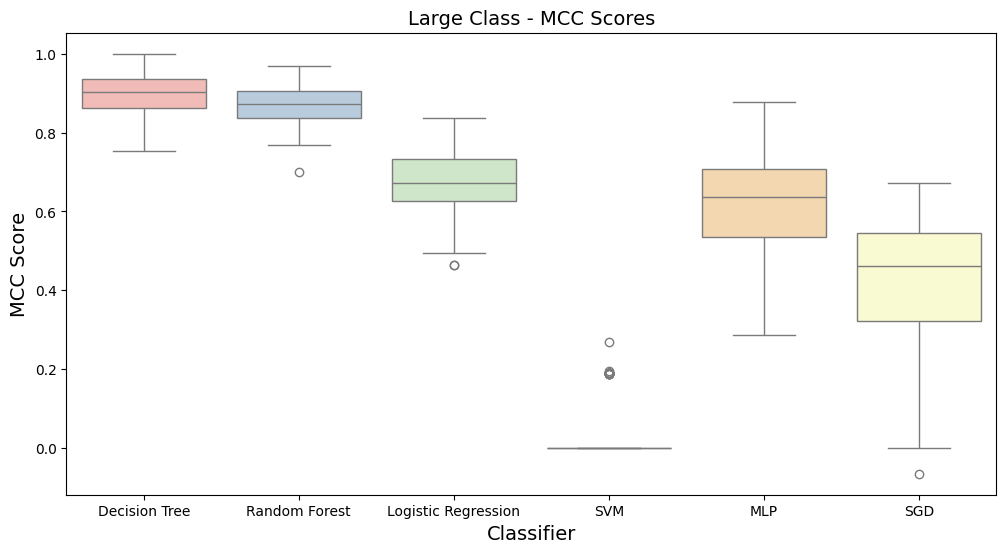

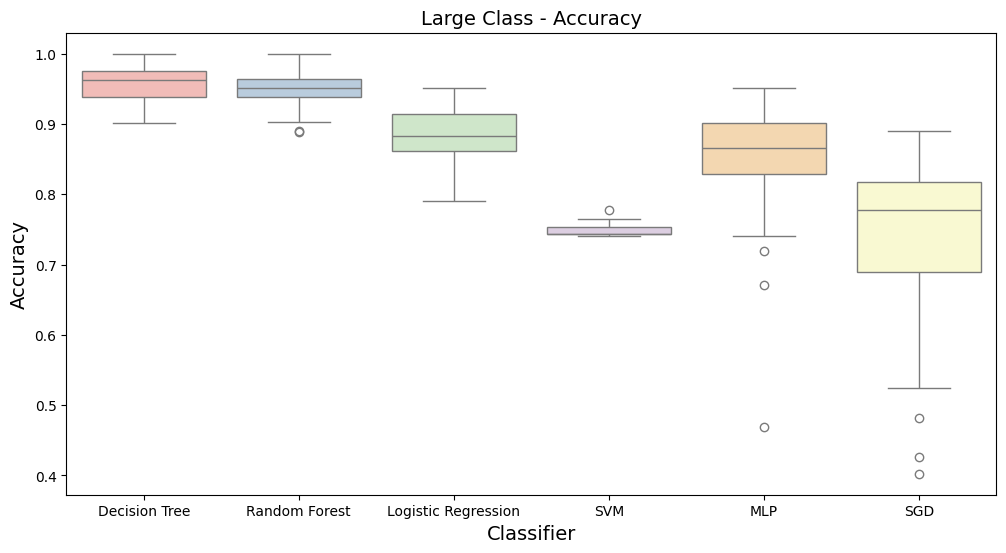

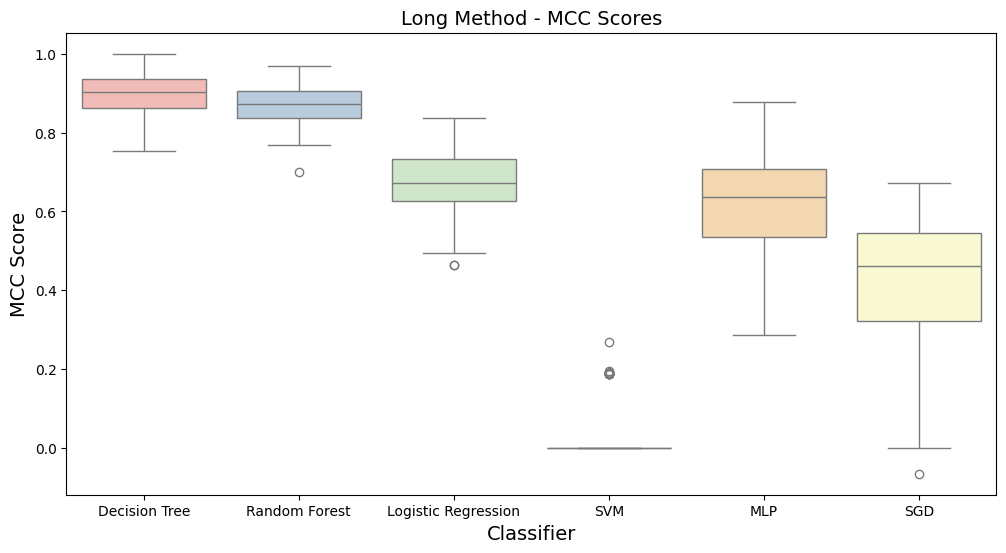

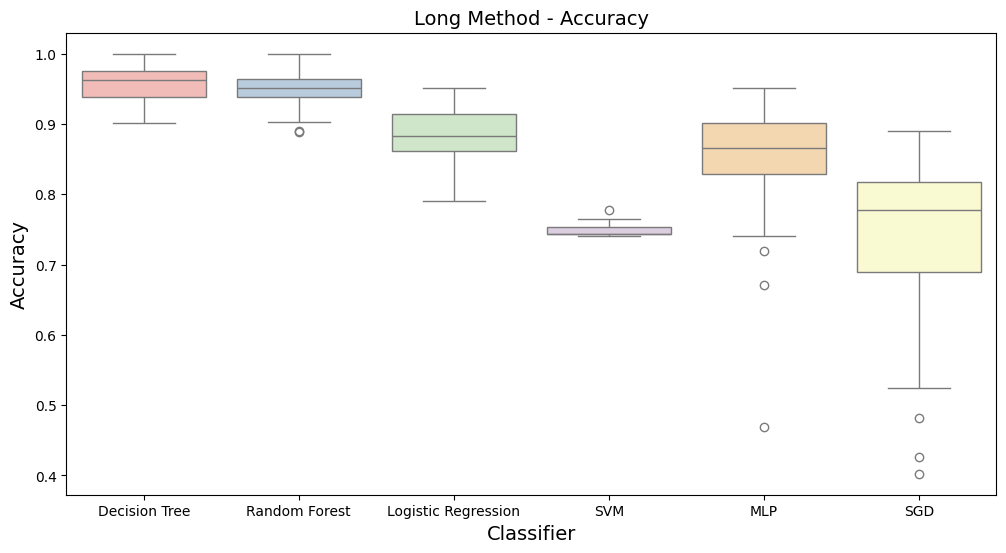

In [151]:
df_large_class_mcc = pd.DataFrame({
    'Decision Tree': DT_Scores,
    'Random Forest': RF_Scores,
    'Logistic Regression': LR_Scores,
    'SVM': SVM_Scores,
    'MLP': MLP_Scores,
    'SGD': SGD_Scores
})

plt.figure(figsize=(12, 6))
boxplot_large_class_mcc = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_large_class_mcc), palette="Pastel1")
boxplot_large_class_mcc.set_title("Large Class - MCC Scores", fontsize=14)
boxplot_large_class_mcc.set_xlabel("Classifier", fontsize=14)
boxplot_large_class_mcc.set_ylabel("MCC Score", fontsize=14)
plt.show()

df_large_class_accuracy = pd.DataFrame({
    'Decision Tree': DT_accuracy,
    'Random Forest': RF_Accuracy,
    'Logistic Regression': LR_Accuracy,
    'SVM': SVM_Accuracy,
    'MLP': MLP_Accuracy,
    'SGD': SGD_Accuracy
})

plt.figure(figsize=(12, 6))
boxplot_large_class_accuracy = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_large_class_accuracy), palette="Pastel1")
boxplot_large_class_accuracy.set_title("Large Class - Accuracy", fontsize=14)
boxplot_large_class_accuracy.set_xlabel("Classifier", fontsize=14)
boxplot_large_class_accuracy.set_ylabel("Accuracy", fontsize=14)
plt.show()

df_long_method_mcc = pd.DataFrame({
    'Decision Tree': DT_Scores,
    'Random Forest': RF_Scores,
    'Logistic Regression': LR_Scores,
    'SVM': SVM_Scores,
    'MLP': MLP_Scores,
    'SGD': SGD_Scores
})

plt.figure(figsize=(12, 6))
boxplot_long_method_mcc = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_long_method_mcc), palette="Pastel1")
boxplot_long_method_mcc.set_title("Long Method - MCC Scores", fontsize=14)
boxplot_long_method_mcc.set_xlabel("Classifier", fontsize=14)
boxplot_long_method_mcc.set_ylabel("MCC Score", fontsize=14)
plt.show()

df_long_method_accuracy = pd.DataFrame({
    'Decision Tree': DT_accuracy,
    'Random Forest': RF_Accuracy,
    'Logistic Regression': LR_Accuracy,
    'SVM': SVM_Accuracy,
    'MLP': MLP_Accuracy,
    'SGD': SGD_Accuracy
})

plt.figure(figsize=(12, 6))
boxplot_long_method_accuracy = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_long_method_accuracy), palette="Pastel1")
boxplot_long_method_accuracy.set_title("Long Method - Accuracy", fontsize=14)
boxplot_long_method_accuracy.set_xlabel("Classifier", fontsize=14)
boxplot_long_method_accuracy.set_ylabel("Accuracy", fontsize=14)
plt.show()


## Average MCC Scores & Accuracy


In [153]:
average_mcc_scores = {
    'Decision Tree': np.mean([DT_Scores.mean(), DT_Scores.mean()]),
    'Random Forest': np.mean([RF_Scores.mean(), RF_Scores.mean()]),
    'Logistic Regression': np.mean([LR_Scores.mean(), LR_Scores.mean()]),
    'SVM': np.mean([SVM_Scores.mean(), SVM_Scores.mean()]),
    'MLP': np.mean([MLP_Scores.mean(), MLP_Scores.mean()]),
    'SGD': np.mean([SGD_Scores.mean(), SGD_Scores.mean()])
}


average_accuracies = {
    'Decision Tree': np.mean([DT_accuracy.mean(), DT_accuracy.mean()]),
    'Random Forest': np.mean([RF_Accuracy.mean(), RF_Accuracy.mean()]),
    'Logistic Regression': np.mean([LR_Accuracy.mean(), LR_Accuracy.mean()]),
    'SVM': np.mean([SVM_Accuracy.mean(), SVM_Accuracy.mean()]),
    'MLP': np.mean([MLP_Accuracy.mean(), MLP_Accuracy.mean()]),
    'SGD': np.mean([SGD_Accuracy.mean(), SGD_Accuracy.mean()])
}

best_classifier_mcc = max(average_mcc_scores, key=average_mcc_scores.get)
best_classifier_accuracy = max(average_accuracies, key=average_accuracies.get)

print("Best Classifier based on MCC Scores:", best_classifier_mcc)
print("Best Classifier based on Accuracy:", best_classifier_accuracy)


Best Classifier based on MCC Scores: Decision Tree
Best Classifier based on Accuracy: Decision Tree


In [154]:
print("MCC Scores:")
print("Large Class - Decision Tree:", DT_Scores.mean())
print("Large Class - Random Forest:", RF_Scores.mean())
print("Large Class - Logistic Regression:", LR_Scores.mean())
print("Large Class - SVM:", SVM_Scores.mean())
print("Large Class - MLP:", MLP_Scores.mean())
print("Large Class - SGD:", SGD_Scores.mean())


print("Long Method - Decision Tree:", DT_Scores.mean())
print("Long Method - Random Forest:", RF_Scores.mean())
print("Long Method - Logistic Regression:", LR_Scores.mean())
print("Long Method - SVM:", SVM_Scores.mean())
print("Long Method - MLP:", MLP_Scores.mean())
print("Long Method - SGD:", SGD_Scores.mean())


print("\nAccuracy:")
print("Large Class - Decision Tree:", DT_accuracy.mean())
print("Large Class - Random Forest:", RF_Accuracy.mean())
print("Large Class - Logistic Regression:", LR_Accuracy.mean())
print("Large Class - SVM:", SVM_Accuracy.mean())
print("Large Class - MLP:", MLP_Accuracy.mean())
print("Large Class - SGD:", SGD_Accuracy.mean())


print("Long Method - Decision Tree:", DT_accuracy.mean())
print("Long Method - Random Forest:", RF_Accuracy.mean())
print("Long Method - Logistic Regression:", LR_Accuracy.mean())
print("Long Method - SVM:", SVM_Accuracy.mean())
print("Long Method - MLP:", MLP_Accuracy.mean())
print("Long Method - SGD:", SGD_Accuracy.mean())


MCC Scores:
Large Class - Decision Tree: 0.8935090117309602
Large Class - Random Forest: 0.8655245608662133
Large Class - Logistic Regression: 0.6795424523865684
Large Class - SVM: 0.03682094915304723
Large Class - MLP: 0.6112946970135812
Large Class - SGD: 0.4216549515795828
Long Method - Decision Tree: 0.8935090117309602
Long Method - Random Forest: 0.8655245608662133
Long Method - Logistic Regression: 0.6795424523865684
Long Method - SVM: 0.03682094915304723
Long Method - MLP: 0.6112946970135812
Long Method - SGD: 0.4216549515795828

Accuracy:
Large Class - Decision Tree: 0.9558672086720865
Large Class - Random Forest: 0.9490168623908463
Large Class - Logistic Regression: 0.8840755796446854
Large Class - SVM: 0.7466907557964472
Large Class - MLP: 0.8596973803071364
Large Class - SGD: 0.7457256850346279
Long Method - Decision Tree: 0.9558672086720865
Long Method - Random Forest: 0.9490168623908463
Long Method - Logistic Regression: 0.8840755796446854
Long Method - SVM: 0.746690755796

In [158]:
if DT_Scores.mean() > RF_Scores.mean() > LR_Scores.mean() > SVM_Scores.mean() > MLP_Scores.mean():
    print("Large Class is the best for MCC Scores.")
else:
    print("Long Method is the best for MCC Scores.")

if DT_accuracy.mean() > RF_Accuracy.mean() > LR_Accuracy.mean() > SVM_Accuracy.mean() > MLP_Accuracy.mean():
    print("Large Class is the best for Accuracy.")
else:
    print("Long Method is the best for Accuracy.")


Long Method is the best for MCC Scores.
Long Method is the best for Accuracy.


In [160]:
accuracy_data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'SGD'],
    'Large Class Accuracy': [DT_accuracy.mean(), RF_Accuracy.mean(), LR_Accuracy.mean(), SVM_Accuracy.mean(), MLP_Accuracy.mean(), SGD_Accuracy.mean()],
    'Long Method Accuracy': [DT_accuracy.mean(), RF_Accuracy.mean(), LR_Accuracy.mean(), SVM_Accuracy.mean(), MLP_Accuracy.mean(), SGD_Accuracy.mean()]
}

accuracy_df = pd.DataFrame(accuracy_data)

print("Accuracy Data:")
print(accuracy_df)

Accuracy Data:
            Classifier  Large Class Accuracy  Long Method Accuracy
0        Decision Tree              0.955867              0.955867
1        Random Forest              0.949017              0.949017
2  Logistic Regression              0.884076              0.884076
3                  SVM              0.746691              0.746691
4                  MLP              0.859697              0.859697
5                  SGD              0.745726              0.745726


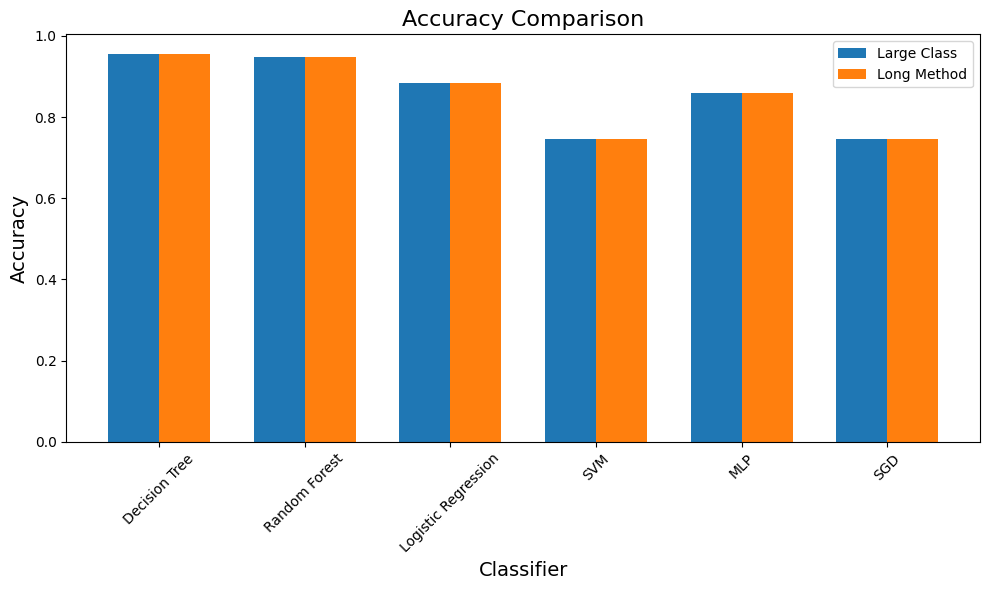

In [161]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = accuracy_df.index
large_class_accuracy = accuracy_df['Large Class Accuracy']
long_method_accuracy = accuracy_df['Long Method Accuracy']

plt.bar(index, large_class_accuracy, bar_width, label='Large Class')
plt.bar(index + bar_width, long_method_accuracy, bar_width, label='Long Method')

plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison', fontsize=16)
plt.xticks(index + bar_width / 2, accuracy_df['Classifier'], rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


# Create a DataFrame for the MCC scores of each classifier


In [164]:


results_data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'SGD'],
    'Large Class MCC': [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores.mean()],
    'Long Method MCC': [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores.mean()]
}

results_df = pd.DataFrame(results_data)

print("Results Table:")
print(results_df)




Results Table:
            Classifier  Large Class MCC  Long Method MCC
0        Decision Tree         0.893509         0.893509
1        Random Forest         0.865525         0.865525
2  Logistic Regression         0.679542         0.679542
3                  SVM         0.036821         0.036821
4                  MLP         0.611295         0.611295
5                  SGD         0.421655         0.421655


## Plot a pie chart to visualize the distribution of MCC scores across classifiers for Large Class


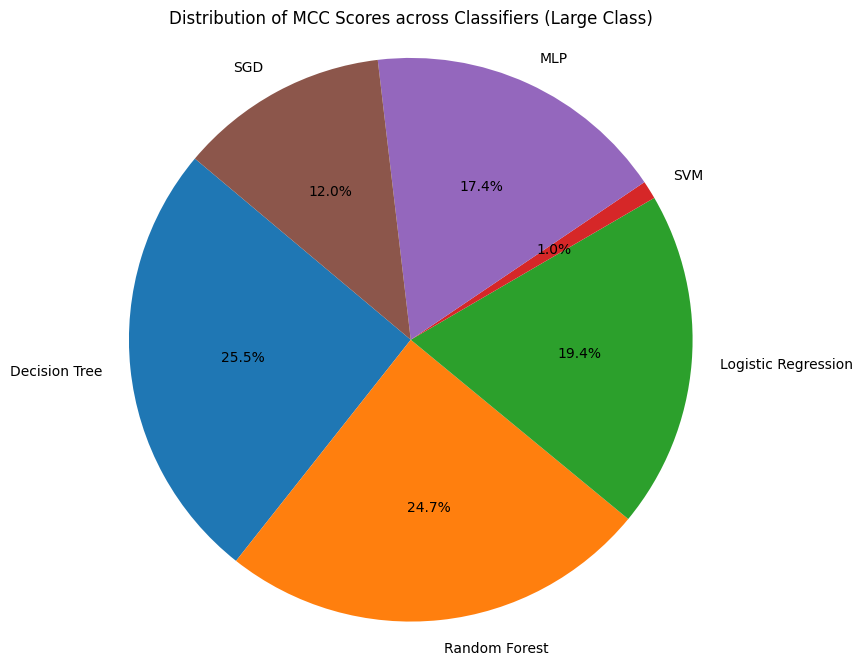

In [165]:
plt.figure(figsize=(8, 8))
plt.pie(results_df['Large Class MCC'], labels=results_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MCC Scores across Classifiers (Large Class)')
plt.axis('equal')
plt.show()

## Plot a pie chart to visualize the distribution of MCC scores across classifiers for Long Method


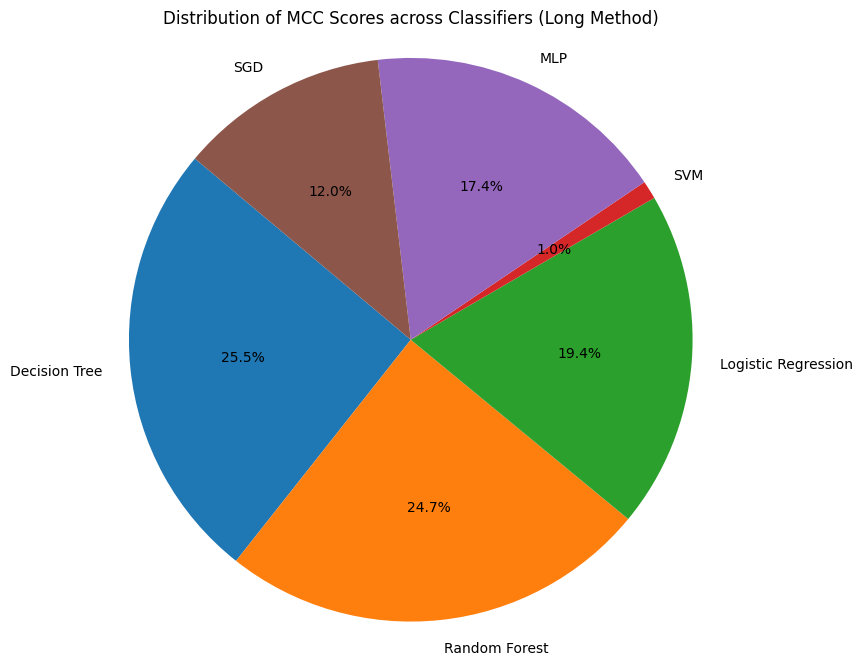

In [166]:
plt.figure(figsize=(8, 8))
plt.pie(results_df['Long Method MCC'], labels=results_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MCC Scores across Classifiers (Long Method)')
plt.axis('equal')
plt.show()

In [168]:
def detect_code_smells(mcc_scores, threshold):
    """
    Detect potential code smells based on MCC scores.

    Parameters:
        mcc_scores (list): List of MCC scores for different models.
        threshold (float): Threshold below which MCC scores are considered indicative of code smells.

    Returns:
        list: List of models with potential code smells.
    """
    code_smells = []
    for i, score in enumerate(mcc_scores):
        if score < threshold:
            code_smells.append(f"Model {i+1}")
    return code_smells

threshold = 100
large_class_models = [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores.mean()]
long_method_models = [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores.mean()]

large_class_code_smells = detect_code_smells(large_class_models, threshold)
long_method_code_smells = detect_code_smells(long_method_models, threshold)

print("Potential code smells in Large Class dataset:", large_class_code_smells)
print("Potential code smells in Long Method dataset:", long_method_code_smells)


Potential code smells in Large Class dataset: ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
Potential code smells in Long Method dataset: ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
